**Author**

Arpan Basu

Uploading the dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Iris (1).csv to Iris (1).csv


Loading the data

In [6]:
import pandas as pd
import io
df= pd.read_csv(io.BytesIO(uploaded['Iris (1).csv']))
print(df[:10])

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


Accessing the first 3 columns of iris dataset used iloc and converting it into list form

In [10]:
x = df.iloc[:, [0, 1, 2, 3]].values

Importing SkLearn to find out the optimal **K** for KMeans Clustering

In [11]:
wcss = []#empty list to store WithinCluster Sum of Squares
from sklearn.cluster import KMeans
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Plotting the results in a Line graph to calculate optimal **K**

Done using Matplotlib

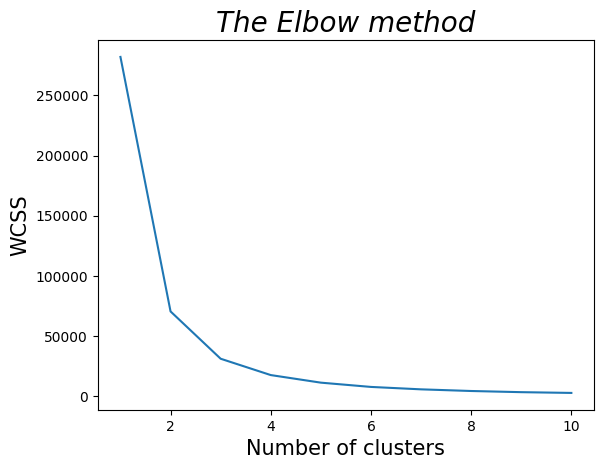

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('The Elbow method',fontsize=20, fontstyle="italic")
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('WCSS',fontsize=15) # WithinCluster Sum of Squares
plt.show()

From the above Graph it is evident that the Elbow (not so sudden descent) occurs at approximately 3

Therefore we can consider **K≈3**

In [16]:
# Fitting K=3 and calculating

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Visual representation of clusters

On first 2 columns

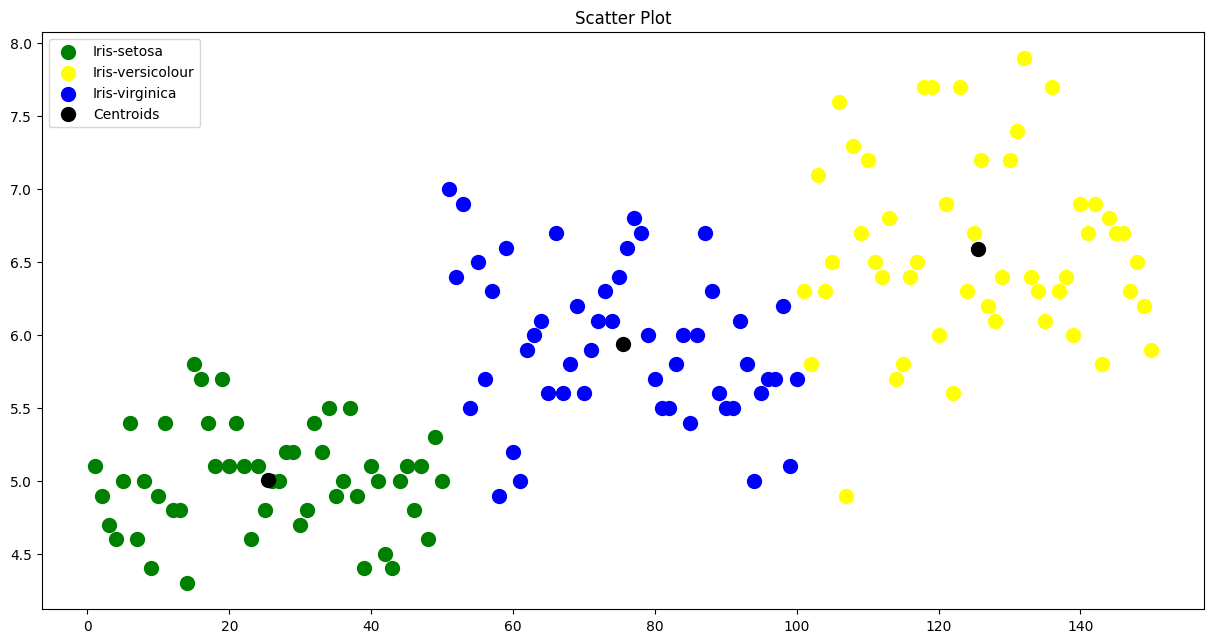

In [26]:
#altering graph size to visualize the data properly
plt.figure(figsize=(15,7.5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting Centroids of the aforementioned clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'Black', label = 'Centroids')
plt.title("Scatter Plot")
plt.legend()